In [7]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns

In [8]:
# run_name = "20251129_055159"
# run_name = "20251129_055314"
run_name = "20251129_055338"
df1 = (
    pd.read_csv(f"logs/{run_name}_custom.csv")
    .reset_index()
    .rename(columns={"index": "idx"})
)
df1["idx"] = df1["idx"] + 1  # start from 1
df1.set_index("idx", inplace=True)
df1["reward_moving_avg"] = df1["episode_reward"].rolling(window=10).mean()
df1["solution_moving_ave"] = df1["best_solution"].rolling(window=10).mean()
df1

,timesteps,best_solution,best_global_value,episode_reward,episode_length,reward_moving_avg,solution_moving_ave
idx,,,,,,,
1,490,332.921132,332.921132,22.817215,490,NaN,NaN
2,1026,353.291989,332.921132,19.433469,536,NaN,NaN
3,1423,336.537048,332.921132,21.006754,397,NaN,NaN
4,1875,343.791014,332.921132,18.433741,452,NaN,NaN
5,2288,361.407001,332.921132,19.353923,413,NaN,NaN
...,...,...,...,...,...,...,...
454,144195,245.247418,191.813620,44.283354,327,44.551722,267.083363
455,144481,253.389220,191.813620,27.417700,286,44.174265,265.609380
456,144785,273.463285,191.813620,34.325410,304,42.668889,266.323078


[177]
177 191.813619778656


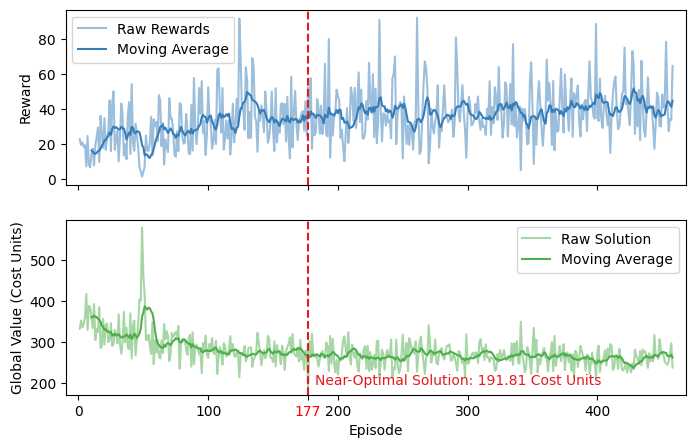

In [9]:
best_solution = df1["best_solution"].min()

min_idxs = df1.index[df1["best_solution"] == best_solution].tolist()
print(min_idxs)
min_idx = df1["best_solution"].idxmin()

print(min_idx, best_solution)

fig, ax = plt.subplots(2, 1, figsize=(8, 5), sharex=True)
colors = sns.color_palette("Set1", 3)
ax[0].plot(
    df1.index.values,
    df1["episode_reward"],
    label="Raw Rewards",
    alpha=0.5,
    color=colors[1],
)
ax[0].plot(
    df1.index.values, df1["reward_moving_avg"], label="Moving Average", color=colors[1]
)
ax[0].axvline(x=min_idx, color=colors[0], linestyle="--")
ax[0].legend()
ax[0].set_ylabel("Reward")

ax[1].plot(
    df1.index.values,
    df1["best_solution"],
    label="Raw Solution",
    alpha=0.5,
    color=colors[2],
)
ax[1].plot(
    df1.index.values,
    df1["solution_moving_ave"],
    label="Moving Average",
    color=colors[2],
)
ax[1].axvline(x=min_idx, color=colors[0], linestyle="--")
ax[1].text(
    min_idx + 5,
    best_solution + 5,
    f"Near-Optimal Solution: {best_solution:.2f} Cost Units",
    color=colors[0],
)
# ax[1].text(min_idx, best_solution["best_solution"] + 15,f" Episode: {min_idx}", color=colors[0])
existing_ticks = ax[1].get_xticks()
extra_ticks = [min_idx]
existing_ticks = sorted(list(existing_ticks) + extra_ticks)
ax[1].set_xticks(existing_ticks)

# Index for special tick
special_tick_indices = [existing_ticks.index(min_idx)]
xtick_labels = ax[1].get_xticklabels()
# Iterate through the tick labels and set color for specific ones
for i, label in enumerate(xtick_labels):
    if i in special_tick_indices:
        label.set_color("red")  # Set the color to red for special ticks
    # else:
    #     label.set_color('black') # Keep other ticks black (or desired default)
ax[1].legend()
ax[1].set_xlabel("Episode")
ax[1].set_ylabel("Global Value (Cost Units)")

ax[1].set_xlim(-10, df1.index.max() + 10)
# plt.suptitle("Training Curve")

os.makedirs("figures", exist_ok=True)
fig.savefig(f"figures/{run_name}_training_curve.png", dpi=300, bbox_inches="tight")
